# Plot the results of the training on the volcano data.

In [85]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from volcapy.grid.grid_from_dsm import Grid


data_folder = "/home/cedric/PHD/Dev/VolcapySIAM/data/InversionDatas/stromboli_173018/"

grid = Grid.load(os.path.join(data_folder, "grid.pickle"))
data_coords = np.load(os.path.join(data_folder, "niklas_data_coords_corrected_final.npy"))

results_folder = "/home/cedric/PHD/Dev/VolcapySIAM/reporting/universal_kriging/results/Stromboli/"
df = pd.read_pickle(os.path.join(results_folder, "train_res_universal.pkl"))
train_df = df[df['nll'].notnull()]
df_const = pd.read_pickle(os.path.join(results_folder, "train_res_constant.pkl"))
train_df_const = df_const[df_const['nll'].notnull()]

In [25]:
train_df

,lambda0,sigma0,beta_hat,nll,train RMSE
0,1.0,1.0,"[[706.6991], [0.1492609]]",183700.875,1.8524691
1,1.0,36.871795,"[[687.2486], [0.08989699]]",86936.296875,0.94837
2,1.0,72.74359,"[[679.6797], [0.08122722]]",37414.878906,0.44375622
3,1.0,108.615385,"[[676.4539], [0.07742239]]",19089.441406,0.24815781
4,1.0,144.487179,"[[674.86127], [0.07545534]]",11080.780273,0.15796177
...,...,...,...,...,...
1589,3000.0,1041.282051,"[[-4200.2734], [0.8111645]]",209.560059,136.566
1592,3000.0,1148.897436,"[[313.3994], [-1.0183506]]",-1133.067871,117.023834
1596,3000.0,1292.384615,"[[-7757.4062], [-0.44691086]]",-1637.873413,772.4007
1597,3000.0,1328.25641,"[[529.1743], [0.08167791]]",-800.99707,25.104969


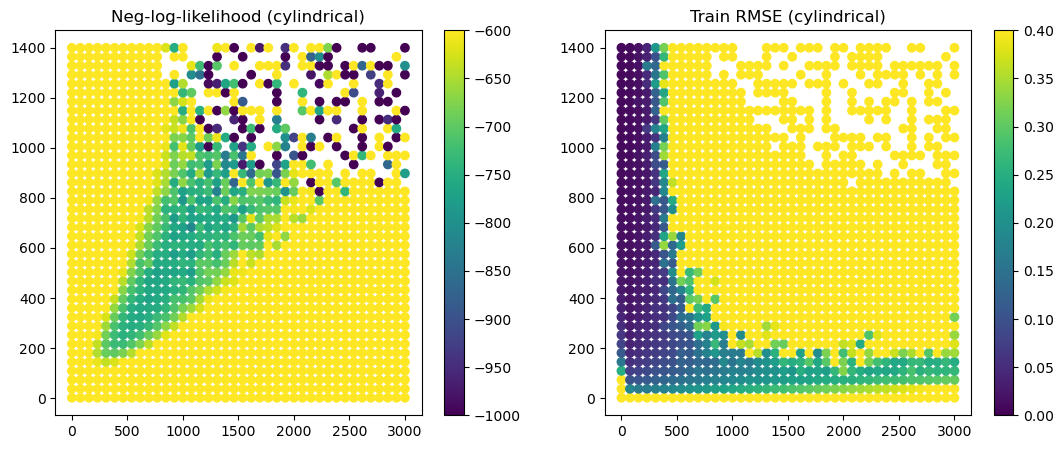

In [44]:
%matplotlib inline
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.scatter(train_df['lambda0'], train_df['sigma0'], c=train_df['nll'], vmax=-600, vmin=-1000)
plt.colorbar()
plt.title("Neg-log-likelihood (cylindrical)")
plt.subplot(122)
plt.scatter(train_df['lambda0'], train_df['sigma0'], c=train_df['train RMSE'], vmin=0, vmax=0.4)
plt.title("Train RMSE (cylindrical)")
plt.colorbar()

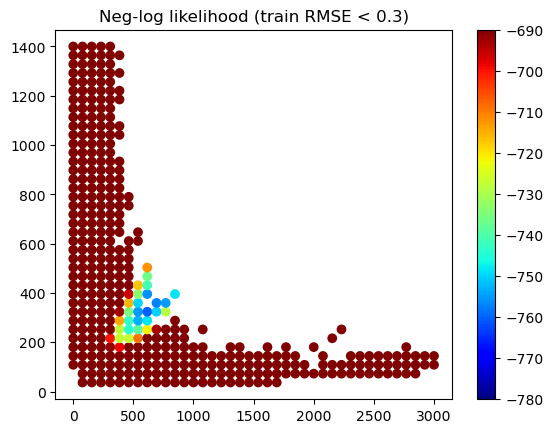

In [33]:
filtered_df = train_df[train_df['train RMSE'] <=0.3]
plt.scatter(filtered_df['lambda0'], filtered_df['sigma0'], c=filtered_df['nll'], vmax=-690, vmin=-780, cmap='jet')
plt.title("Neg-log likelihood (train RMSE < 0.3)")
plt.colorbar()

In [28]:
filtered_df[filtered_df['nll'] == filtered_df['nll'].min()]

,lambda0,sigma0,beta_hat,nll,train RMSE
329,616.179487,323.846154,"[[94.6918], [0.26234937]]",-760.521362,0.1602103


In [29]:
train_df[326:333]

,lambda0,sigma0,beta_hat,nll,train RMSE
326,616.179487,216.230769,"[[142.46613], [0.25048637]]",-678.067993,0.10440133
327,616.179487,252.102564,"[[122.24481], [0.2570374]]",-721.106567,0.1045366
328,616.179487,287.974359,"[[107.17139], [0.259997]]",-748.419434,0.13938849
329,616.179487,323.846154,"[[94.6918], [0.26234937]]",-760.521362,0.1602103
330,616.179487,359.717949,"[[69.25156], [0.27409136]]",-760.760376,0.4686037
331,616.179487,395.589744,"[[69.853516], [0.2681259]]",-755.899292,0.29830936
332,616.179487,431.461538,"[[63.229553], [0.2780465]]",-741.275513,0.26068476


## Model with constant only.

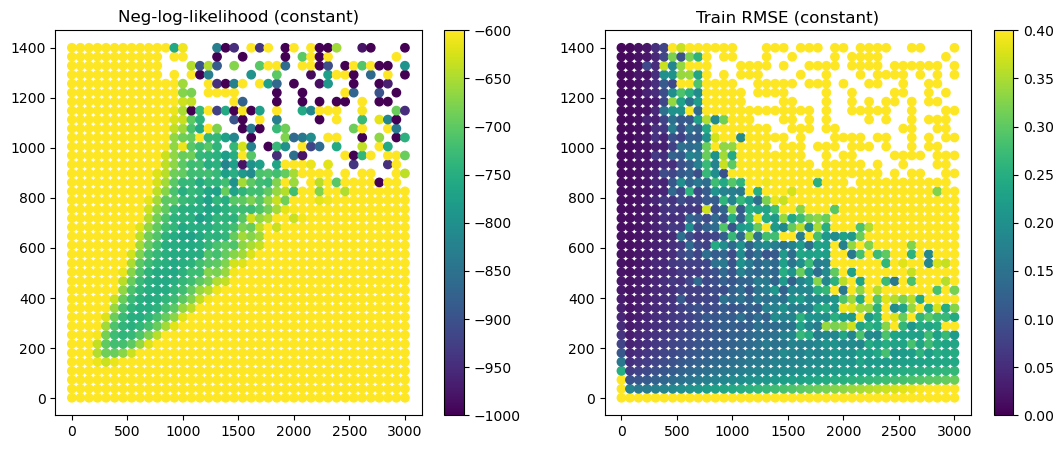

In [34]:
%matplotlib inline
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.scatter(train_df_const['lambda0'], train_df_const['sigma0'], c=train_df_const['nll'], vmax=-600, vmin=-1000)
plt.colorbar()
plt.title("Neg-log-likelihood (constant)")
plt.subplot(122)
plt.scatter(train_df_const['lambda0'], train_df_const['sigma0'], c=train_df_const['train RMSE'], vmin=0, vmax=0.4)
plt.title("Train RMSE (constant)")
plt.colorbar()

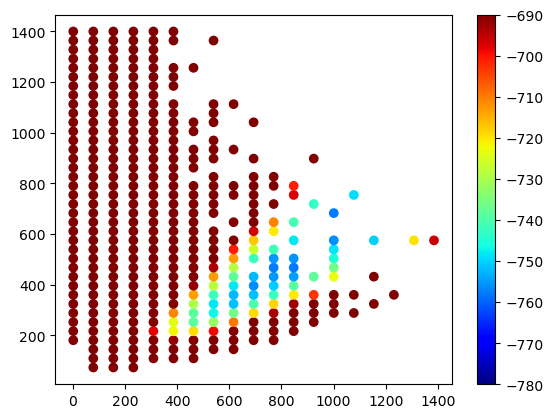

In [35]:
filtered_df_const = train_df_const[train_df_const['train RMSE'] <=0.12]
plt.scatter(filtered_df_const['lambda0'], filtered_df_const['sigma0'], c=filtered_df_const['nll'], vmax=-690, vmin=-780, cmap='jet')
plt.colorbar()

In [17]:
filtered_df_const[filtered_df_const['nll'] == filtered_df_const['nll'].min()]

,lambda0,sigma0,beta_hat,nll,train RMSE
453,846.871795,467.333333,[[544.8717]],-757.934753,0.09626736


In [39]:
## Model with trend along N41 fault line.

In [40]:
df_N41 = pd.read_pickle(os.path.join(results_folder, "train_res_N41.pkl"))

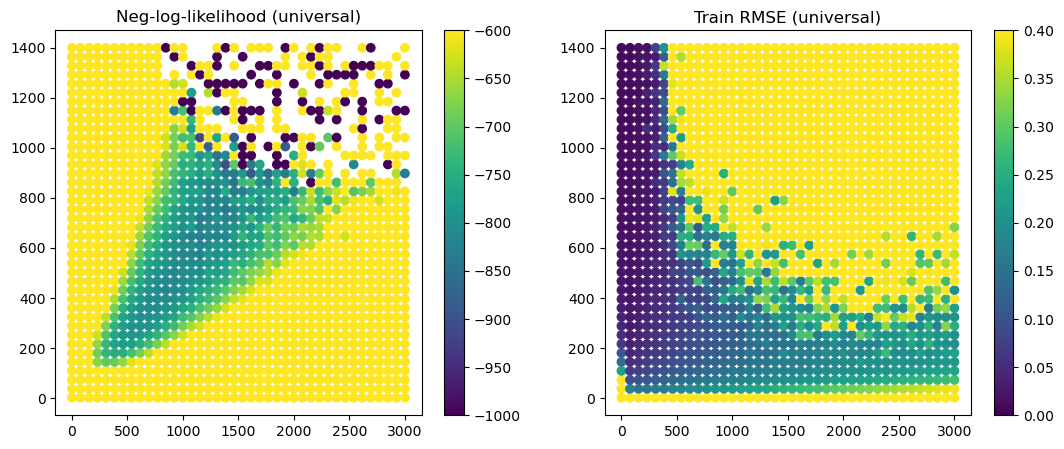

In [42]:
%matplotlib inline
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.scatter(df_N41['lambda0'], df_N41['sigma0'], c=df_N41['nll'], vmax=-600, vmin=-1000)
plt.colorbar()
plt.title("Neg-log-likelihood (universal)")
plt.subplot(122)
plt.scatter(df_N41['lambda0'], df_N41['sigma0'], c=df_N41['train RMSE'], vmin=0, vmax=0.4)
plt.title("Train RMSE (universal)")
plt.colorbar()

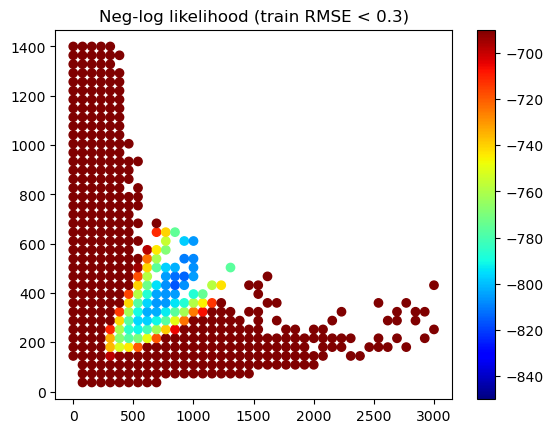

In [51]:
filtered_df_N41 = df_N41[df_N41['train RMSE'] <=0.2]
plt.scatter(filtered_df_N41['lambda0'], filtered_df_N41['sigma0'], c=filtered_df_N41['nll'], vmax=-690, vmin=-850, cmap='jet')
plt.title("Neg-log likelihood (train RMSE < 0.3)")
plt.colorbar()

In [52]:
# Find minimum.
filtered_df_N41[filtered_df_N41['nll'] == filtered_df_N41['nll'].min()]

,lambda0,sigma0,beta_hat,nll,train RMSE
452,846.871795,431.461538,"[[457.31738], [-0.24815309], [-0.08005023], [0...",-816.459473,0.12504181


## Plot posterior means.

In [55]:
post_mean_cyl = np.load(os.path.join(results_folder, "post_mean_cyl.npy"))
post_mean_cst = np.load(os.path.join(results_folder, "post_mean_cst.npy"))
post_mean_N41 = np.load(os.path.join(results_folder, "post_mean_N41.npy"))

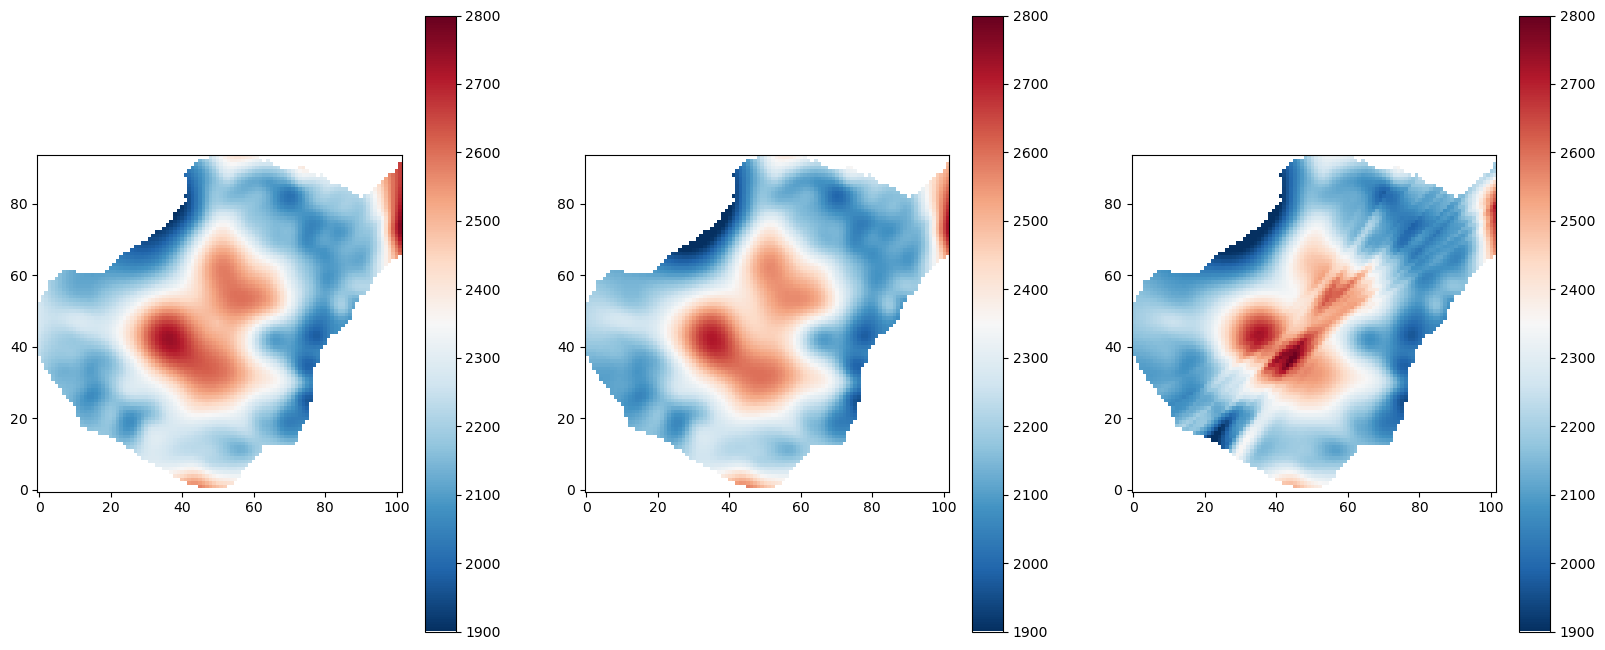

In [69]:
%matplotlib inline
meshed_post_mean_cyl = grid.mesh_values(post_mean_cyl) + 1600
meshed_post_mean_cst = grid.mesh_values(post_mean_cst) + 1600
meshed_post_mean_N41 = grid.mesh_values(post_mean_N41) + 1600

plt.figure(figsize=(20, 8))                                          
plt.subplot(131)                                                       
plt.imshow(meshed_post_mean_cyl[:, :, 16].T, vmin=1900, vmax=2800, cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(132)                                                      
ax = plt.imshow(meshed_post_mean_cst[:, :, 16].T, vmin=1900, vmax=2800, cmap="RdBu_r")
# plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar()
plt.subplot(133)                                        
plt.imshow(meshed_post_mean_N41[:, :, 16].T, vmin=1900, vmax=2800, cmap="RdBu_r")
plt.gca().invert_yaxis()
plt.colorbar()

## Plot leave-one-out residuals.

In [70]:
residuals_loocv_cyl = np.load(os.path.join(results_folder, "residuals_loocv_cyl.npy"))
residuals_loocv_cst = np.load(os.path.join(results_folder, "residuals_loocv_cst.npy"))
residuals_loocv_N41 = np.load(os.path.join(results_folder, "residuals_loocv_N41.npy"))

In [76]:
print("Cylindrical {}".format(np.mean(residuals_loocv_cyl)))
print("Constant {}".format(np.mean(residuals_loocv_cst)))
print("N41 {}".format(np.mean(residuals_loocv_N41)))

Cylindrical -0.003249111818149686
Constant -0.0030808476731181145
N41 -0.00417168578132987


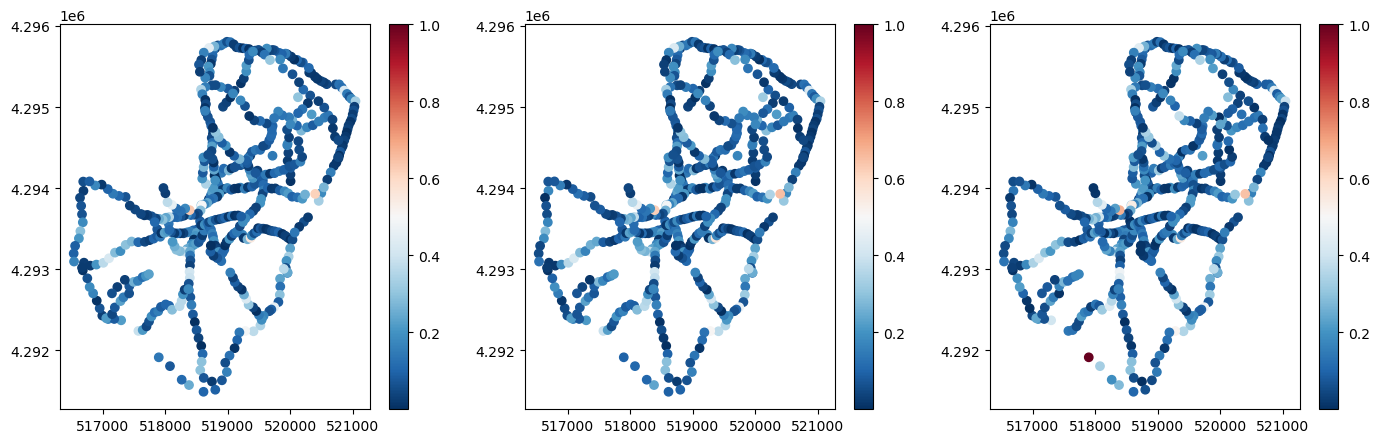

In [94]:
plt.figure(figsize=(17, 5))                                          
plt.subplot(131)   
plt.scatter(data_coords[:, 0], data_coords[:, 1], c=np.abs(residuals_loocv_cyl), cmap='RdBu_r', vmax=1.0)
plt.colorbar()
plt.subplot(132)   
plt.scatter(data_coords[:, 0], data_coords[:, 1], c=np.abs(residuals_loocv_cst), cmap='RdBu_r', vmax=1.0)
plt.colorbar()
plt.subplot(133)   
plt.scatter(data_coords[:, 0], data_coords[:, 1], c=np.abs(residuals_loocv_N41), cmap='RdBu_r', vmax=1.0)
plt.colorbar()

## Plot k-folds residuals.

In [101]:
residuals_kfolds_cyl = np.load(os.path.join(results_folder, "residuals_kfolds_cyl.npy"), allow_pickle=True)
residuals_kfolds_cst = np.load(os.path.join(results_folder, "residuals_kfolds_cst.npy"), allow_pickle=True)
residuals_kfolds_N41 = np.load(os.path.join(results_folder, "residuals_kfolds_N41.npy"), allow_pickle=True)

folds_inds = np.load(os.path.join(results_folder, "folds_inds.pkl"), allow_pickle=True)

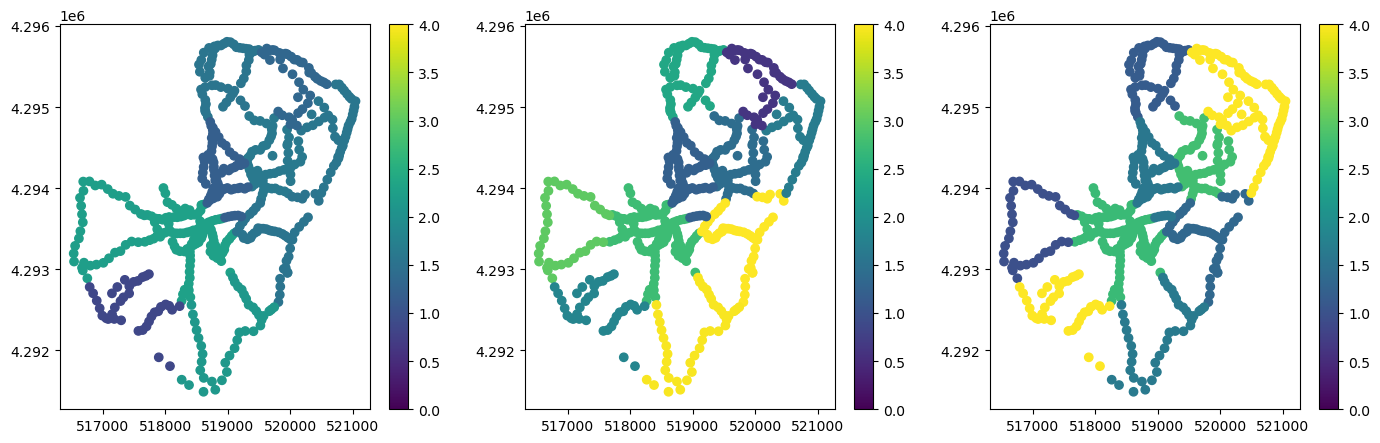

In [116]:
plt.figure(figsize=(17, 5))                                          
plt.subplot(131) 
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], c=np.repeat(np.mean(np.abs(residuals_kfolds_cyl[i])), len(fold)), vmin=0, vmax=4)
plt.colorbar()

plt.subplot(132) 
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], c=np.repeat(np.mean(np.abs(residuals_kfolds_cst[i])), len(fold)), vmin=0, vmax=4)
plt.colorbar()

plt.subplot(133) 
for i, fold in enumerate(folds_inds):
    plt.scatter(data_coords[fold, 0], data_coords[fold, 1], c=np.repeat(np.mean(np.abs(residuals_kfolds_N41[i])), len(fold)), vmin=0, vmax=4)
plt.colorbar()

In [104]:
for residual in residuals_kfolds_cst:
    print(np.mean(residual))

-1.3304102813041139
2.4580134817649086
-3.8893498250690413
-2.9802322177851526
-2.375525730429915
-0.9262191930258298
0.018266319303705775
-0.5930919347886429
-3.9655134461689583
-1.7060793024838419
